In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [3]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [4]:
%reload_ext autoreload
%autoreload 2


In [5]:


import numpy as np # linear algebra
import pandas as pd 


# fastai
from fastai import *
from fastai.vision import *

import os
print(os.listdir("./pizzadataset"))


# path = Path('../pizzadataset')

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test', 'models', 'train']


In [6]:
path = Path('./pizzadataset')
path

PosixPath('pizzadataset')

In [7]:

#data = ImageDataBunch.from_folder(path, train = "train", test = "test", ds_tfms=get_transforms(), size=299, bs=32, num_workers=0).normalize(imagenet_stats)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms=get_transforms(), size=299, bs=32, num_workers=0).normalize(imagenet_stats)


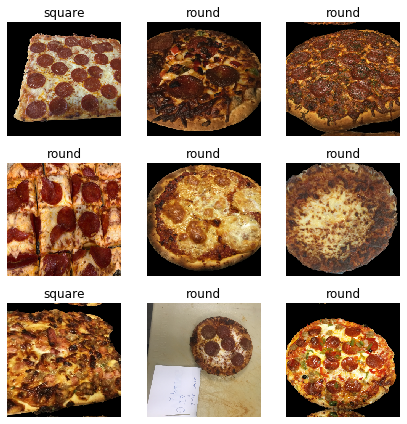

In [8]:
data.show_batch(rows=3, figsize=(6,6))

In [9]:
type(data)

fastai.vision.data.ImageDataBunch

In [11]:
# define the test and train data (80-20 rule)
data

ImageDataBunch;

Train: LabelList (112 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
square,square,square,square,square
Path: pizzadataset;

Valid: LabelList (28 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
round,square,square,round,round
Path: pizzadataset;

Test: None

In [12]:
data.classes

['round', 'square']

In [25]:
learn = create_cnn(data, models.resnet34, metrics = [error_rate, accuracy])

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.044471,0.509742,0.214286,0.785714,01:59
1,0.774747,0.120409,0.071429,0.928571,01:54
2,0.586325,0.117301,0.071429,0.928571,01:58
3,0.499951,0.120446,0.035714,0.964286,01:56


In [15]:
learn.save("stage-shape")


In [33]:
# save the stage-shape fastai into pytorch
import torch 
loc = torch.load("./pizzadataset/models/stage-shape.pth")
body = create_body(models.resnet50, True, None)
data_classes = 2
nf = callbacks.hooks.num_features_model(body) * 2
head = create_head(nf, data_classes, None, ps=0.5, bn_final=False)
model = nn.Sequential(body, head)


In [1]:
#model.load_state_dict(loc['model'])

In [37]:
#model.save("stage-shape.h5")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


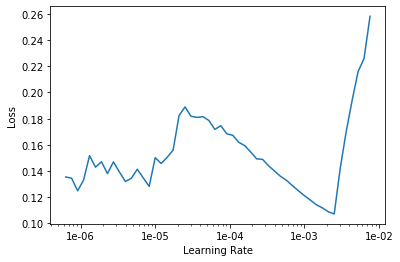

In [38]:
#Initiating refit and checking LR
learn.load("stage-shape")
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.export("stage_shape.pkl")

In [41]:
#Uploaded a separate dataset for testing each of the above classes.
PRED_PATH = "./testimages"
img_91 = open_image(f'{PRED_PATH}/91.jpg')
img_92 = open_image(f'{PRED_PATH}/92.jpg')
img_117 = open_image(f'{PRED_PATH}/117.jpg')
img_118 = open_image(f'{PRED_PATH}/118.jpg')

In [42]:
learn.load('stage-shape')
pred_class = learn.predict(img_91)
pred_class

(Category tensor(0), tensor(0), tensor([1.0000e+00, 9.0851e-08]))

In [43]:
learn.load('stage-shape')
pred_class = learn.predict(img_92)
pred_class

(Category tensor(0), tensor(0), tensor([1.0000e+00, 4.3486e-06]))

In [44]:
learn.load('stage-shape')
pred_class = learn.predict(img_117)
pred_class

(Category tensor(1), tensor(1), tensor([1.3348e-04, 9.9987e-01]))

In [45]:
learn.load('stage-shape')
pred_class = learn.predict(img_118)
pred_class

(Category tensor(1), tensor(1), tensor([1.2292e-05, 9.9999e-01]))

In [46]:
#Uploaded a separate dataset for testing each of the above classes.
PRED_PATH = "./testimages"
plate = open_image(f'{PRED_PATH}/plate.jpg')
learn.load('stage-shape')
pred_class = learn.predict(plate)
pred_class

(Category tensor(0), tensor(0), tensor([9.9999e-01, 7.0021e-06]))